In [ ]:
import json 
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
from bs4 import BeautifulSoup
import string 

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]
table = str.maketrans('', '', string.punctuation)


In [ ]:
%cd gdrive
%cd My Drive 
%cd TFCertification
%pwd

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/TFCertification


'/content/gdrive/My Drive/TFCertification'

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-04-09 15:08:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-04-09 15:08:35 (197 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
%ls

'Copy of Course 2 - Part 4 - Lesson 2 - Notebook (Cats v Dogs Augmentation) (1).ipynb'
'Copy of Course 2 - Part 4 - Lesson 2 - Notebook (Cats v Dogs Augmentation).ipynb'
'Copy of Course 3 - Week 1 - Lesson 1.ipynb'
'Copy of Course 3 - Week 1 - Lesson 2.ipynb'
'Copy of Course 3 - Week 1 - Lesson 3.ipynb'
'Copy of Course 3 - Week 4 - Lesson 2 - Notebook.ipynb'
'Copy of Exercise_1_House_Prices_Question.ipynb'
'Copy of Exercise2-Question.ipynb'
'Copy of Exercise 3 - Question.ipynb'
'Copy of Exercise 4-Question (1).ipynb'
'Copy of Exercise 4-Question.ipynb'
'Copy of Lab3-What-Are-Convolutions.ipynb'
'Copy of Lab4-Using-Convolutions.ipynb'
'Copy of Lab5-Using-Convolutions-With-Complex-Images.ipynb'
 glove
 glove.twitter.27B.25d.txt
 glove.twitter.27B.25d.txt.gz
 Hello-ML-World.ipynb
 Lab2-Computer-Vision.ipynb
 Lab6-Cats-v-Dogs.ipynb
 RNNsTFBook.ipynb
 TFDS_MNIST.ipynb
 TFGuide/


In [ ]:
import json 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)


In [ ]:
import json 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = []
labels = []
urls = []

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)
    for item in datastore:
        sentence = item['headline'].lower()
        sentence = sentence.replace(",", " , ")
        sentence = sentence.replace(".", " . ")
        sentence = sentence.replace("-", " - ")
        sentence = sentence.replace("/", " / ")
        soup = BeautifulSoup(sentence)
        sentence = soup.get_text()
        words = sentence.split()
        filtered_sentence = ""
        for word in words:
            word = word.translate(table)
            if word not in stopwords:
                filtered_sentence = filtered_sentence + word + " "
        sentences.append(filtered_sentence)
        labels.append(item['is_sarcastic'])
        urls.append(item['article_link'])

training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

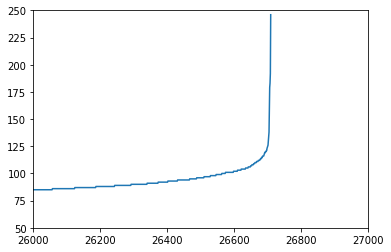

85


In [ ]:
xs = []
ys = []

current_item = 1
for item in sentences:
  xs.append(current_item)
  current_item = current_item+1
  ys.append(len(item))
newys = sorted(ys)

%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(xs, newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])


In [ ]:

vocab_size = 13200
embedding_dim = 25
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
wc = tokenizer.word_counts
#wc

In [ ]:
import numpy as np 
training_padded = np.asarray(training_padded)
testing_padded = np.asarray(testing_padded)
training_labels = np.asarray(training_labels)
testing_labels = np.asarray(testing_labels)

In [ ]:
model = tf.keras.Sequential([
                  tf.keras.layers.Embedding(vocab_size, embedding_dim),
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                  tf.keras.layers.Dense(24, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,349,169
Trainable params: 1,349,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
719/719 - 28s - loss: 0.6905 - accuracy: 0.5482 - val_loss: 0.6863 - val_accuracy: 0.5700
Epoch 2/30
719/719 - 10s - loss: 0.6849 - accuracy: 0.5596 - val_loss: 0.6809 - val_accuracy: 0.5700
Epoch 3/30
719/719 - 10s - loss: 0.6810 - accuracy: 0.5596 - val_loss: 0.6767 - val_accuracy: 0.5700
Epoch 4/30
719/719 - 10s - loss: 0.6760 - accuracy: 0.5596 - val_loss: 0.6708 - val_accuracy: 0.5700
Epoch 5/30
719/719 - 10s - loss: 0.6670 - accuracy: 0.5623 - val_loss: 0.6598 - val_accuracy: 0.5848
Epoch 6/30
719/719 - 10s - loss: 0.6496 - accuracy: 0.6246 - val_loss: 0.6370 - val_accuracy: 0.6703
Epoch 7/30
719/719 - 11s - loss: 0.6208 - accuracy: 0.6865 - val_loss: 0.6129 - val_accuracy: 0.6883
Epoch 8/30
719/719 - 10s - loss: 0.5927 - accuracy: 0.7066 - val_loss: 0.5884 - val_accuracy: 0.7061
Epoch 9/30
719/719 - 10s - loss: 0.5622 - accuracy: 0.7326 - val_loss: 0.5616 - val_accuracy: 0.7312
Epoch 10/30
719/719 - 10s - loss: 0.5267 - accuracy: 0.7573 - val_loss: 0.5341 - val_accura

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

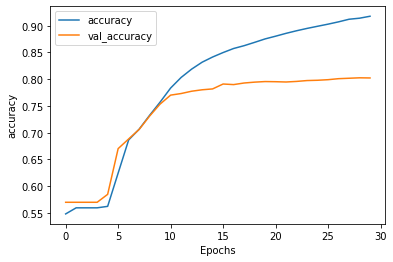

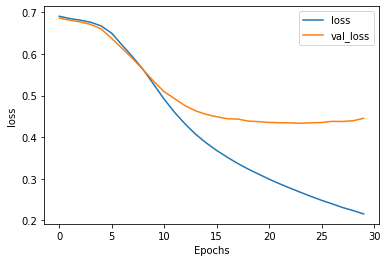

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Now trying a stacked lstm 
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,447,985
Trainable params: 1,447,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
719/719 - 21s - loss: 0.4766 - accuracy: 0.7647 - val_loss: 0.4130 - val_accuracy: 0.8056
Epoch 2/30
719/719 - 16s - loss: 0.2489 - accuracy: 0.8993 - val_loss: 0.4121 - val_accuracy: 0.8115
Epoch 3/30
719/719 - 16s - loss: 0.1292 - accuracy: 0.9536 - val_loss: 0.5342 - val_accuracy: 0.8013
Epoch 4/30
719/719 - 16s - loss: 0.0709 - accuracy: 0.9751 - val_loss: 0.7221 - val_accuracy: 0.7919
Epoch 5/30
719/719 - 16s - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0.8629 - val_accuracy: 0.7935
Epoch 6/30
719/719 - 16s - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.9236 - val_accuracy: 0.7972
Epoch 7/30
719/719 - 16s - loss: 0.0158 - accuracy: 0.9947 - val_loss: 1.1423 - val_accuracy: 0.7848
Epoch 8/30
719/719 - 16s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 1.2232 - val_accuracy: 0.7921
Epoch 9/30
719/719 - 16s - loss: 0.0072 - accuracy: 0.9973 - val_loss: 1.3801 - val_accuracy: 0.7873
Epoch 10/30
719/719 - 16s - loss: 0.0048 - accuracy: 0.9987 - val_loss: 1.4692 - val_accura

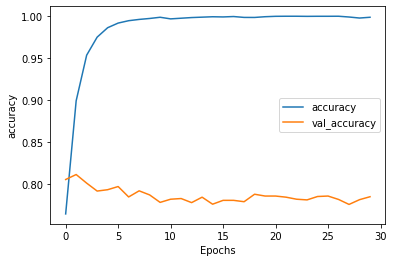

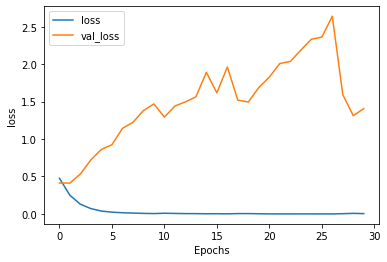

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Now trying a stacked lstm 
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 1,447,985
Trainable params: 1,447,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
719/719 - 112s - loss: 0.6884 - accuracy: 0.5585 - val_loss: 0.6829 - val_accuracy: 0.5700
Epoch 2/30
719/719 - 109s - loss: 0.6834 - accuracy: 0.5596 - val_loss: 0.6797 - val_accuracy: 0.5700
Epoch 3/30
719/719 - 113s - loss: 0.6809 - accuracy: 0.5596 - val_loss: 0.6765 - val_accuracy: 0.5700
Epoch 4/30
719/719 - 113s - loss: 0.6754 - accuracy: 0.5597 - val_loss: 0.6687 - val_accuracy: 0.5716
Epoch 5/30
719/719 - 112s - loss: 0.6551 - accuracy: 0.6107 - val_loss: 0.6285 - val_accuracy: 0.6592
Epoch 6/30
719/719 - 115s - loss: 0.5869 - accuracy: 0.7046 - val_loss: 0.5645 - val_accuracy: 0.7094
Epoch 7/30
719/719 - 115s - loss: 0.4952 - accuracy: 0.7675 - val_loss: 0.5124 - val_accuracy: 0.7487
Epoch 8/30
719/719 - 113s - loss: 0.4350 - accuracy: 0.8039 - val_loss: 0.5007 - val_accuracy: 0.7520
Epoch 9/30
719/719 - 116s - loss: 0.3996 - accuracy: 0.8240 - val_loss: 0.4894 - val_accuracy: 0.7660
Epoch 10/30
719/719 - 116s - loss: 0.3743 - accuracy: 0.8392 - val_loss: 0.4832 - 

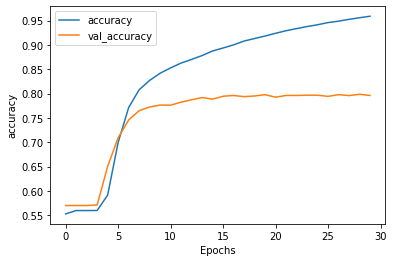

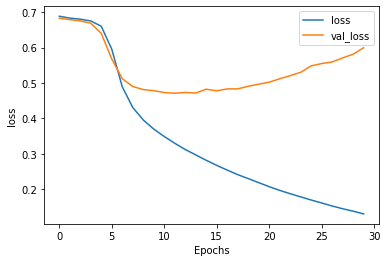

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Now trying a stacked lstm with dropout: note it's added as a parameter as opposed to another statement 
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
719/719 - 22s - loss: 0.6903 - accuracy: 0.5451 - val_loss: 0.6852 - val_accuracy: 0.5700
Epoch 2/30
719/719 - 16s - loss: 0.6844 - accuracy: 0.5596 - val_loss: 0.6806 - val_accuracy: 0.5700
Epoch 3/30
719/719 - 16s - loss: 0.6824 - accuracy: 0.5596 - val_loss: 0.6789 - val_accuracy: 0.5700
Epoch 4/30
719/719 - 16s - loss: 0.6799 - accuracy: 0.5596 - val_loss: 0.6757 - val_accuracy: 0.5700
Epoch 5/30
719/719 - 16s - loss: 0.6744 - accuracy: 0.5620 - val_loss: 0.6677 - val_accuracy: 0.5824
Epoch 6/30
719/719 - 16s - loss: 0.6602 - accuracy: 0.6129 - val_loss: 0.6474 - val_accuracy: 0.6495
Epoch 7/30
719/719 - 16s - loss: 0.6287 - accuracy: 0.6780 - val_loss: 0.6099 - val_accuracy: 0.6905
Epoch 8/30
719/719 - 16s - loss: 0.5671 - accuracy: 0.7298 - val_loss: 0.5372 - val_accuracy: 0.7458
Epoch 9/30
719/719 - 16s - loss: 0.4933 - accuracy: 0.7718 - val_loss: 0.5018 - val_accuracy: 0.7633
Epoch 10/30
719/719 - 16s - loss: 0.4545 - accuracy: 0.7942 - val_loss: 0.4834 - val_accura

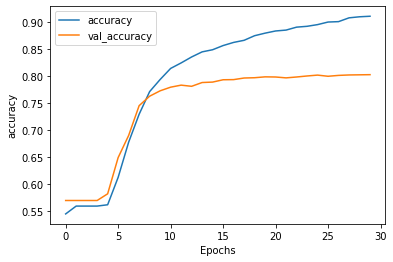

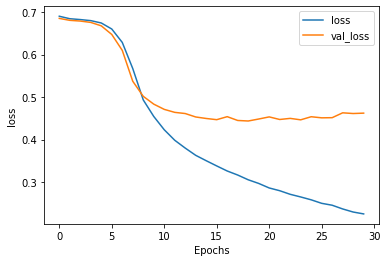

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
glove_embeddings = dict()
f = open('glove.twitter.27B.25d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  glove_embeddings[word] = coefs 
f.close()

In [ ]:
embedding_dim = 25

In [ ]:
glove_embeddings['frog']

array([-1.2158  , -0.74924 ,  0.91941 ,  0.72985 , -0.12917 , -0.19555 ,
        1.2365  , -0.77196 ,  0.85161 ,  0.11922 ,  0.16816 ,  0.33334 ,
       -2.0845  , -0.53471 ,  0.013538,  0.18178 ,  1.2831  ,  0.089331,
        0.57264 ,  0.50694 ,  0.27134 ,  0.66504 ,  0.54097 , -0.58377 ,
        0.67097 ], dtype=float32)

In [ ]:
# Create the embedding matrix 
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
  if index > vocab_size - 1:
    break 
  else:
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector 
      


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
xs = []
ys = []
cumulative_x = []
cumulative_y = []
total_y = 0
for word, index in tokenizer.word_index.items():
  xs.append(index)
  cumulative_x.append(index)
  if glove_embeddings.get(word) is not None:
    total_y = total_y + 1
    ys.append(1)
  else:
    ys.append(0)
  cumulative_y.append(total_y/ index)

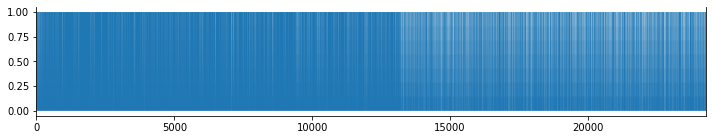

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)

plt.margins(x=0, y=None, tight=True)
plt.fill(ys)

(0.0, 25000.0, 0.915, 0.985)

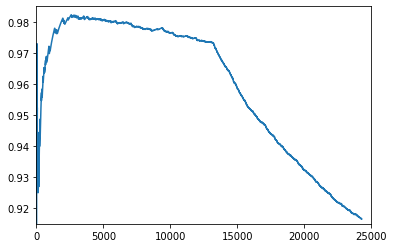

In [ ]:
plt.plot(cumulative_x, cumulative_y)
plt.axis([0,25000, 0.915, 0.985])

In [ ]:

vocab_size = 13200
embedding_dim = 25
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

In [ ]:
vocab_size=13200
# Create the embedding matrix 
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
  if index > vocab_size - 1:
    break 
  else:
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector 
      


model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
719/719 - 28s - loss: 0.6921 - accuracy: 0.5236 - val_loss: 0.6866 - val_accuracy: 0.5872
Epoch 2/30
719/719 - 7s - loss: 0.6809 - accuracy: 0.5806 - val_loss: 0.6753 - val_accuracy: 0.5840
Epoch 3/30
719/719 - 7s - loss: 0.6679 - accuracy: 0.5999 - val_loss: 0.6604 - val_accuracy: 0.6355
Epoch 4/30
719/719 - 7s - loss: 0.6465 - accuracy: 0.6518 - val_loss: 0.6379 - val_accuracy: 0.6522
Epoch 5/30
719/719 - 7s - loss: 0.6253 - accuracy: 0.6653 - val_loss: 0.6256 - val_accuracy: 0.6552
Epoch 6/30
719/719 - 7s - loss: 0.6156 - accuracy: 0.6706 - val_loss: 0.6187 - val_accuracy: 0.6611
Epoch 7/30
719/719 - 7s - loss: 0.6097 - accuracy: 0.6751 - val_loss: 0.6135 - val_accuracy: 0.6681
Epoch 8/30
719/719 - 7s - loss: 0.6052 - accuracy: 0.6809 - val_loss: 0.6091 - val_accuracy: 0.6730
Epoch 9/30
719/719 - 7s - loss: 0.6014 - accuracy: 0.6835 - val_loss: 0.6053 - val_accuracy: 0.6775
Epoch 10/30
719/719 - 7s - loss: 0.5983 - accuracy: 0.6859 - val_loss: 0.6022 - val_accuracy: 0.681

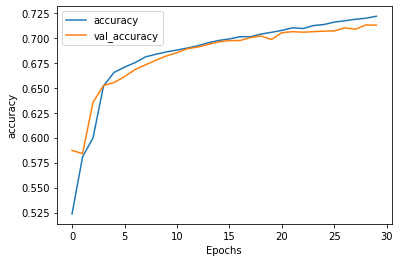

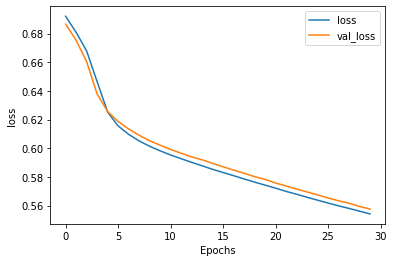

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")